In [ ]:
# Goal: Make a quick way to make training and testing data. 
# Just call get_training_testing_data, tell the size, and bounds, and function
# Still need to add noising function

In [136]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from functools import partial

plt.rcParams.update({'font.size': 14}) # like larger font

def linear(x, m=1, b=0):
    return m*x + b

def get_training_testing_data(boundsTraining=[0,1], boundsTesting=[0,1], TrainingSize=1000, TestingSize=1000, function=linear, noising_sigma = 0):
    # Default parameters shown above
    vector = np.linspace(boundsTraining[0], boundsTraining[1], TrainingSize)
    noise_vector = noising_sigma*np.random.randn(TrainingSize)
    offset = (boundsTraining[1] - boundsTraining[0])/(2*TrainingSize)
    training_data = []
    [training_data.append(tuple([vector[k], function(vector[k] + noise_vector[k])])) for k in range(vector.shape[0])]
    
    vector = np.linspace(boundsTesting[0], boundsTesting[1], TestingSize)
    noise_vector = noising_sigma*np.random.randn(TestingSize)
    offset = (boundsTesting[1] - boundsTesting[0])/(2*TestingSize)
    testing_data = []
    [testing_data.append(tuple([vector[k]+offset, function(vector[k]+offset)])) for k in range(vector.shape[0])]
    
    return training_data, testing_data

# Learning algorithm needs the data broken out into X and y
def break_into_X_y(data):
    X = [x[0] for x in data]
    y = [x[1] for x in data]
    return X, y

def linear(x, m=1, b=0):
    return m*x + b

def quadratic(x,a=1,b=1,c=1):
    return a*x**2 + b*x + c

def cubic(x, a=1, b= 1, c=1, d=1):
    return a*ax**3 + b*x**2 + c*x + d

def periodic(x, w=1, A=1, f=0):
    return A*sin(w*x + f)

def compositefunction(x):
    return -np.sin(x + 1) + np.exp(-x**2)

def plotting_train_andor_test_sets(train_data, test_data="None"):
    X_train, y_train = break_into_X_y(train_data)
    if test_data == "None":
        plt.plot(X_train, y_train, 'k--', linewidth=2.0)
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Training')
        plt.grid(True)
    else:
        X_test, y_test = break_into_X_y(test_data)
        fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,sharey=False,figsize=(10,5))
        fig.tight_layout()
        ax1.plot(X_train, y_train, 'k--', linewidth=2.0)
        ax1.set(xlabel='Input', ylabel='Output', title='Training')
        ax1.grid(True)
        
        ax2.plot(X_test, y_test, 'r--', linewidth=2.0)
        ax2.set(xlabel='Input', ylabel='Output', title='Testing')
        plt.tight_layout()
        ax2.grid(True)
#        ax.subplots_adjust(hspace=0.75)

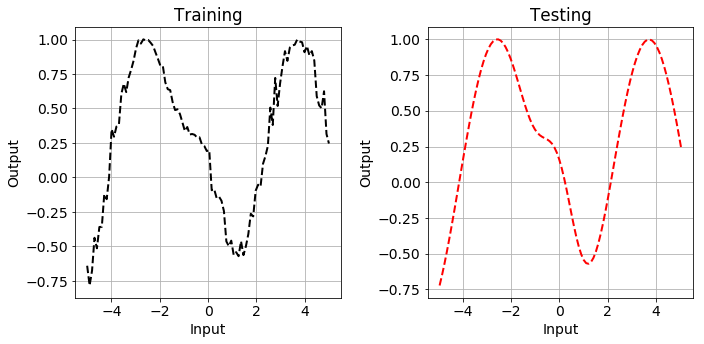

In [139]:
# example usage
#partial_quadratic = partial(quadratic, a=-2, b=1, c=0)
#train, test = get_training_testing_data(bounds=[-5,5], size=100, function=compositefunction, noising_sigma=0.1)
#X_train, y_train = break_into_X_y(train)
#X_test, y_test = break_into_X_y(test)
#plotting_train_andor_test_sets(train, test_data=test)